## Introduction

In [706]:
### Code to Analyze Crunchbase and Google Trends data
# Written by David Chataway

In [707]:
# Run notebook with functions
%run ./imports_and_functions.ipynb

## Import Data

In [708]:
# List filenames by technology ORDERED chronologically
filenames = {
    'Cyber Security':['cyber-security-search-1-1-2013.csv','Cyber-Security-Google-1-1-2013.csv']
    ,'3D Printing':['3d-printing-search-1-1-2017.csv', '3D-Printing-Google-1-1-2017.csv']
    ,'Big Data':['big-data-search-1-1-2017.csv','Big-Data-Google-1-1-2017.csv']
    ,'Quantum Computing':['quantum-search-1-1-2019.csv','Quantum-Computing-Google-1-1-2019.csv']
    ,'Internet of Things (IoT)':['iot-search-6-1-2018.csv','Internet-of-Things-Google-6-1-2018.csv']
    ,'Virtual Reality':['virtual-reality-search-1-1-2020.csv','Virtual-Reality-Google-1-1-2020.csv']
    ,'Artificial Intelligence':["artificial-intelligence-search-1-1-2022.csv", "Artificial-Intelligence-1-1-2022.csv"]
    ,'Cryptocurrency':['cryptocurrency-search-3-13-2023.csv','Cryptocurrency-Google-3-13-2023.csv']
    ,'Metaverse':['metaverse-search-3-13-2023.csv','Metaverse-Google-3-13-2023.csv']
    ,'Web3':["web-3-search-3-11-2023.csv", "Web3-Google-3-11-2023.csv"]
    #,'Natural Language Processing':['nlp-search-3-13-2023.csv','NLP-Google-3-13-2023.csv']
}

In [709]:
# List queries for the data
queries = {
    'Equity Only Funding':'Yes'
    ,'Funding Stage':'Seed' # Seed or Early Stage Venture
}

In [710]:
dfs = {}
    # Key = technology
    # [0] = raw Crunchbase data
    # [1] = queried Crunchbase data
    # [2] = Crunchbase data by day
    # [3] = Crunchbase data by week
    # [4] = Google data
    # [5] = Merged data by week
    
for key in filenames.keys():
    # Loop through the technologies and run the functions to import 1) Crunchbase and 2) Google data
    df_raw, df_queried, df_day, df_week = read_crunchbase_export(filenames[key][0], queries)
    df_google = read_google_trends_export(filenames[key][1])
    # Mergine the datasets
    df_combined_week = merge_weekly(df_google, df_week)
    # Assigning to the dictionary
    dfs[key] = []
    dfs[key].append(df_raw)
    dfs[key].append(df_queried)
    dfs[key].append(df_day)
    dfs[key].append(df_week)
    dfs[key].append(df_google)
    dfs[key].append(df_combined_week)    

## Processing the Dataset

In [711]:
# Create a new dictionary with the main dataframe
df_mains = {}
for key in dfs.keys():
    df_mains[key] = dfs[key][5]

In [712]:
# Running processing scripts
window_size = 3 # not a big difference between 3 and 5 week moving average window
df_mains = post_processing(df_mains, window_size)

In [713]:
# Finding peaks
min_height = 0.6 # 0.75 looks to be too selective of the top peak and not the peaks leading up to it
df_peaks = peaks(df_mains, min_height)

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: PeakPropertyWarning: some peaks have a prominence of 0
C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: PeakPropertyWarning: some peaks have a width of 0


## EDA

In [714]:
df_mains['Big Data']

,Unnamed: 1,Start_of_week,date,count,Total Funding Amount Currency (in USD),Money Raised Currency (in USD),Pre-Money Valuation Currency (in USD),Total Funding Amount Currency (in USD) %,Money Raised Currency (in USD) %,Pre-Money Valuation Currency (in USD) %,...,Money Raised Currency (in USD)-Rolling %,Money Raised Currency (in USD) %-Rolling,Pre-Money Valuation Currency (in USD)-Rolling,Pre-Money Valuation Currency (in USD)-Rolling %,Pre-Money Valuation Currency (in USD) %-Rolling,count-Rolling,count-Rolling %,count %-Rolling,Google Trends-Rolling,Google Trends-Rolling %
0,14,2011-12-26,2012-01-01,2,306500000.0,28000000.0,0.0,15.251557,2.910619,0.0,...,8.604400,2.910619,0.0,0.0,0.000000e+00,2.000000,42.857143,25.000000,14.000000,14.685315
1,23,2012-01-02,2012-01-08,0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,2.868133,0.970206,0.0,0.0,0.000000e+00,0.666667,14.285714,8.333333,19.000000,19.930070
2,20,2012-01-09,2012-01-15,0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,7.733717,2.616092,0.0,0.0,0.000000e+00,0.666667,14.285714,8.333333,20.333333,21.328671
3,18,2012-01-16,2012-01-22,2,437500000.0,75500000.0,0.0,21.770167,7.848276,0.0,...,7.733717,2.616092,0.0,0.0,0.000000e+00,0.666667,14.285714,8.333333,22.333333,23.426573
4,29,2012-01-23,2012-01-29,0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,9.270216,3.135845,0.0,0.0,0.000000e+00,1.000000,21.428571,12.500000,24.000000,25.174825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,68,2016-11-28,2016-12-04,1,52700000.0,22000000.0,0.0,2.622372,2.286915,0.0,...,6.832303,2.311170,0.0,0.0,5.921189e-16,1.000000,21.428571,12.500000,68.333333,71.678322
258,66,2016-12-05,2016-12-11,1,79900000.0,42000000.0,0.0,3.975854,4.365928,0.0,...,9.659463,3.267516,0.0,0.0,5.921189e-16,1.666667,35.714286,20.833333,62.000000,65.034965
259,52,2016-12-12,2016-12-18,3,81118558.0,30300000.0,0.0,4.036490,3.149705,0.0,...,8.379559,2.834562,0.0,0.0,5.921189e-16,2.000000,42.857143,25.000000,52.000000,54.545455
260,38,2016-12-19,2016-12-25,2,49960104.0,9505000.0,0.0,2.486034,0.988051,0.0,...,4.558795,1.542108,0.0,0.0,5.921189e-16,2.000000,42.857143,25.000000,48.000000,50.349650


In [715]:
df_mains['Big Data'].describe()

,count,Total Funding Amount Currency (in USD),Money Raised Currency (in USD),Pre-Money Valuation Currency (in USD),Total Funding Amount Currency (in USD) %,Money Raised Currency (in USD) %,Pre-Money Valuation Currency (in USD) %,count %,Google Trends,Total Funding Amount Currency (in USD)-Rolling,...,Money Raised Currency (in USD)-Rolling %,Money Raised Currency (in USD) %-Rolling,Pre-Money Valuation Currency (in USD)-Rolling,Pre-Money Valuation Currency (in USD)-Rolling %,Pre-Money Valuation Currency (in USD) %-Rolling,count-Rolling,count-Rolling %,count %-Rolling,Google Trends-Rolling,Google Trends-Rolling %
count,262.000000,2.620000e+02,2.620000e+02,2.620000e+02,262.000000,262.000000,262.000000,262.000000,262.000000,2.620000e+02,...,262.000000,262.000000,2.620000e+02,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,2.000000,1.788099e+08,2.428962e+07,7.738761e+06,8.897649,2.524922,0.818917,25.000000,62.404580,1.791662e+08,...,7.473267,2.527989,7.738761e+06,2.456750,0.818917,2.001272,42.884406,25.015903,62.413486,65.468692
std,1.587789,2.873718e+08,6.248752e+07,6.009644e+07,14.299731,6.495619,6.359411,19.847358,18.103271,1.649781e+08,...,10.831832,3.664094,3.429247e+07,10.886500,3.628833,0.975432,20.902109,12.192897,17.555360,18.414713
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,14.685315
25%,1.000000,1.577975e+07,5.000000e+06,0.000000e+00,0.785206,0.519753,0.000000,12.500000,52.000000,5.496757e+07,...,3.444321,1.165114,0.000000e+00,0.000000,0.000000,1.333333,28.571429,16.666667,52.750000,55.332168
50%,2.000000,6.494150e+07,1.400000e+07,0.000000e+00,3.231514,1.455309,0.000000,25.000000,65.000000,1.313543e+08,...,5.688972,1.924414,0.000000e+00,0.000000,0.000000,2.000000,42.857143,25.000000,65.166667,68.356643
75%,3.000000,2.282609e+08,2.739594e+07,0.000000e+00,11.358348,2.847826,0.000000,37.500000,75.000000,2.558504e+08,...,8.654530,2.927576,4.000000e+06,1.269841,0.423280,2.666667,57.142857,33.333333,75.250000,78.933566
max,8.000000,2.009631e+09,9.619947e+08,9.450000e+08,100.000000,100.000000,100.000000,100.000000,100.000000,9.258193e+08,...,100.000000,33.827099,3.150000e+08,100.000000,33.333333,4.666667,100.000000,58.333333,95.333333,100.000000


## Time-Series Plots

In [716]:
filenames.keys()

dict_keys(['Cyber Security', '3D Printing', 'Big Data', 'Quantum Computing', 'Internet of Things (IoT)', 'Virtual Reality', 'Artificial Intelligence', 'Cryptocurrency', 'Metaverse', 'Web3'])

In [717]:
# Identify the technology for the plots
key = '3D Printing'

# Plotting
plt.rcParams.update({'font.size': 24})
saving_plots = False
standardize = False

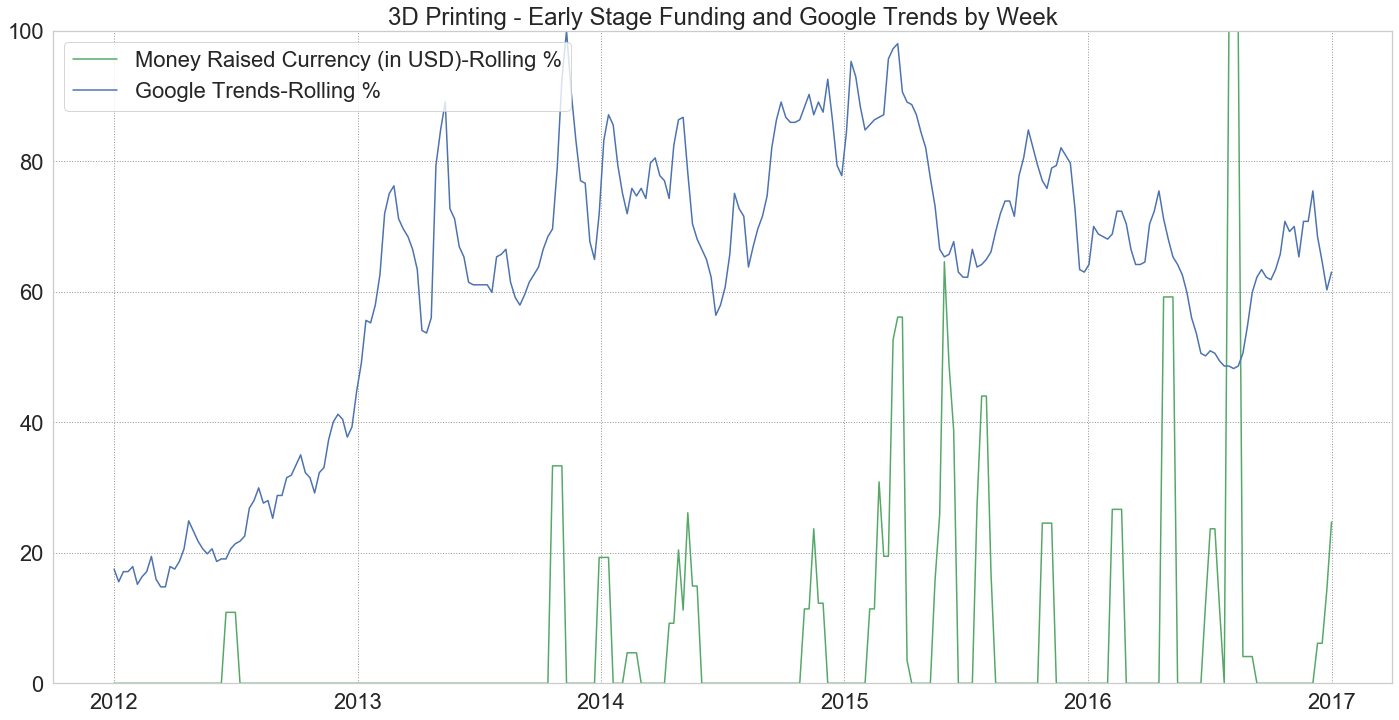

In [718]:
plot_time_single_technology (key, 'date', 'Money Raised Currency (in USD)-Rolling %', 'Google Trends-Rolling %', saving_plots, standardize)

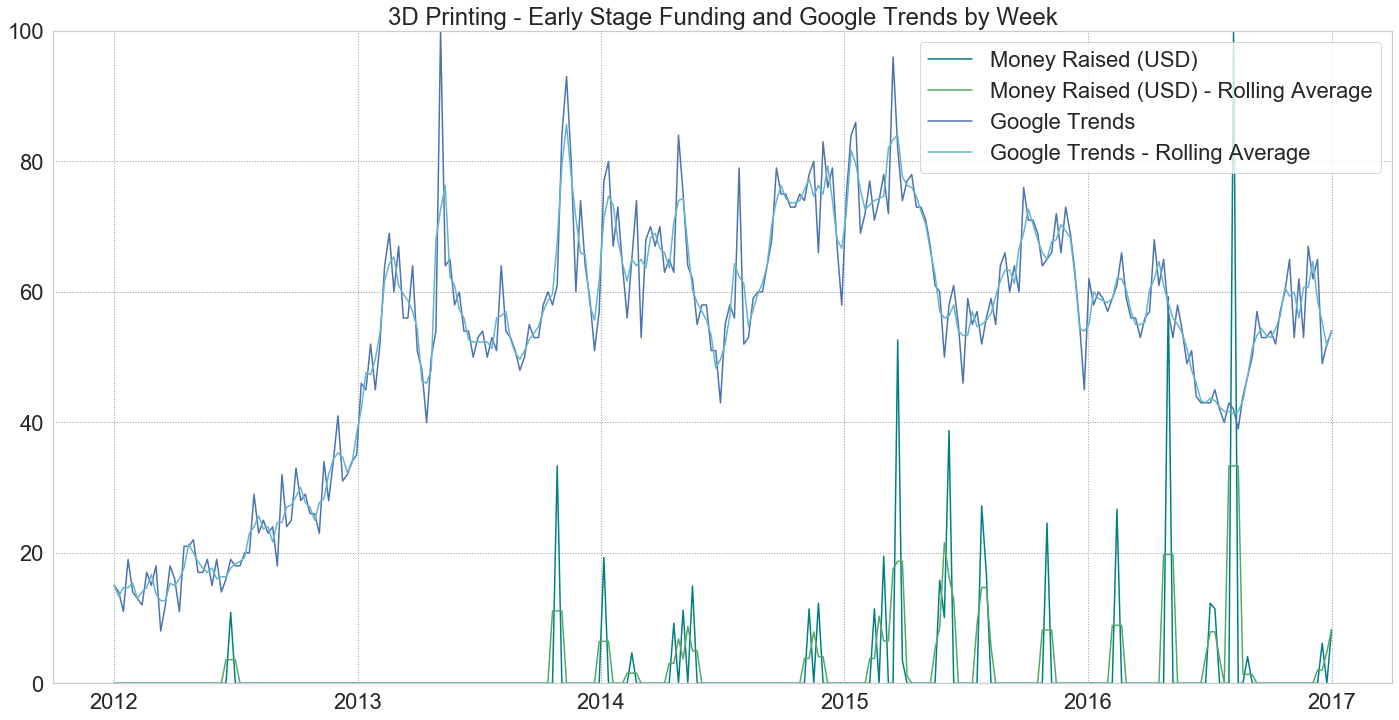

In [719]:
# Analyze Smoothing
x = df_mains[key]['date']
y = df_mains[key]['Money Raised Currency (in USD) %']
y_smooth = df_mains[key]['Money Raised Currency (in USD) %-Rolling']
z = df_mains[key]['Google Trends']
z_smooth = df_mains[key]['Google Trends-Rolling']

plt.figure(figsize=(24, 12))
plt.plot(x,y, color='teal',label = 'Money Raised (USD)')
plt.plot(x,y_smooth, color = 'g', label = 'Money Raised (USD) - Rolling Average')

#plt.plot(x,y2,label = 'Deal Count')
plt.plot(x,z, color='b', label='Google Trends')
plt.plot(x,z_smooth, color='c', label = 'Google Trends - Rolling Average')

plt.title(key + ' - Early Stage Funding and Google Trends by Week')
plt.legend()
plt.ylim([0,100])
plt.show()

## Identification of Peak Hype and Peak Funding

Refer to the imports_and_functions.py code for the output of the "peaks" function.

Output is a single nested dictionary whereby the first key is the 'technology'.

Other important keys are:
<li>'Hype' = the date by which the maximum Google Trends occured
<li>'Variable'+'Rolling_array' = an array with the indices of peaks
<li>'Variable'+'Rolling_array_date' = an array with dates of the peaks
<li>'Variable'+'Rolling' = a single index corresponding to the earliest peak of the variable
<li>'Variable'+'Rolling_date' = a single date corresponding to the earliest peak of the variable
<li>'Variable'+'Rolling'+'_full_widths' = full width information of the peaks
<li>'Variable'+'Rolling'+'_width' = width of the peak in question

In [720]:
list(df_mains.keys())

['Cyber Security',
 '3D Printing',
 'Big Data',
 'Quantum Computing',
 'Internet of Things (IoT)',
 'Virtual Reality',
 'Artificial Intelligence',
 'Cryptocurrency',
 'Metaverse',
 'Web3']

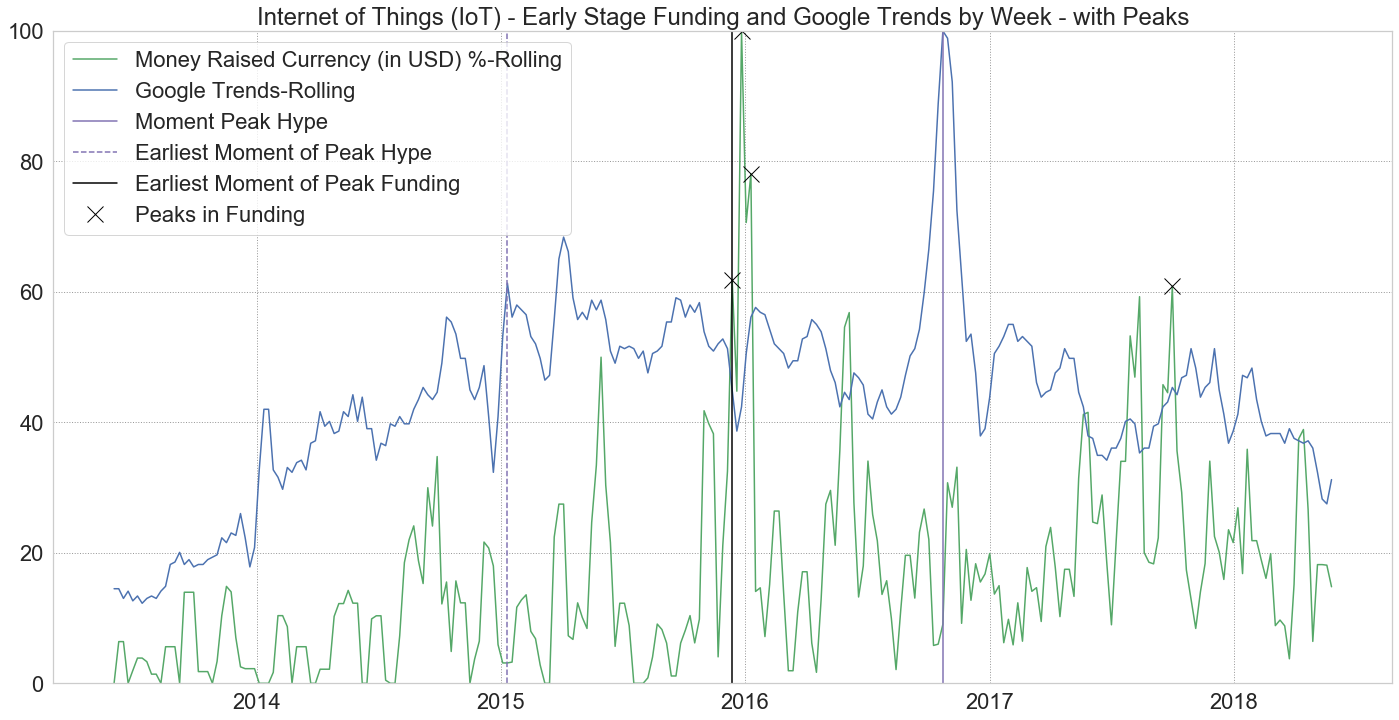

In [721]:
key = 'Internet of Things (IoT)'
saving_plots = False
standardize = True

plot_time_single_technology_peaks (key, 'date','Money Raised Currency (in USD) %-Rolling','Google Trends-Rolling', saving_plots, standardize)

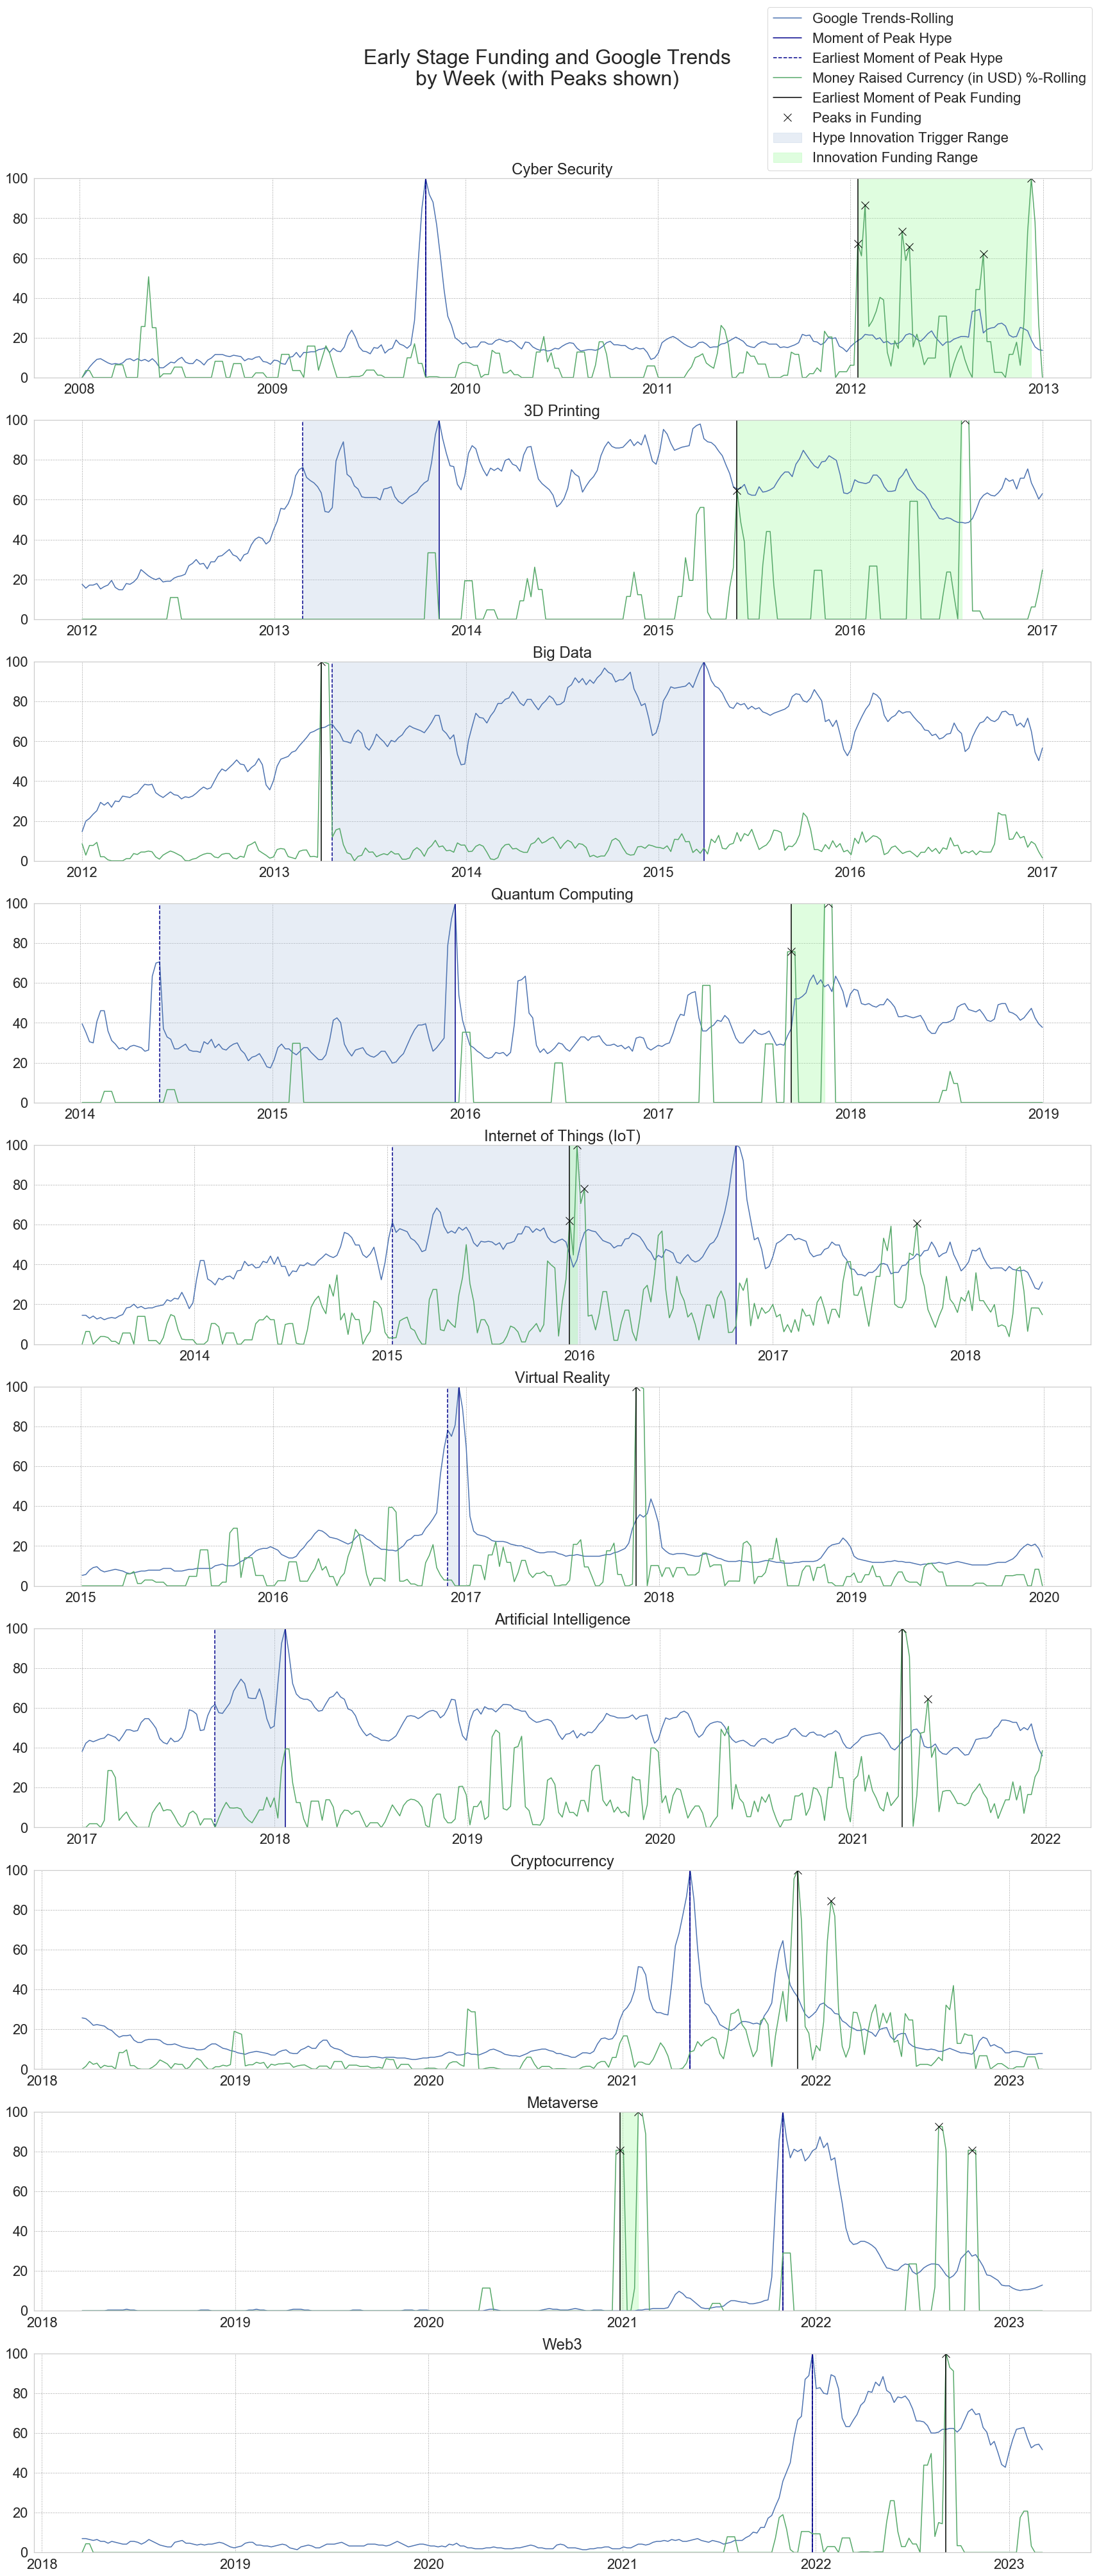

In [722]:
saving_plots = True

plt, fig, df_return = plot_time_multi_technology_peaks (list(df_mains.keys()), 'date','Money Raised Currency (in USD) %-Rolling','Google Trends-Rolling', saving_plots, standardize)

The average time difference between hype and funding cycles is: 496.3
The standard deviation is: 495.8100543554961


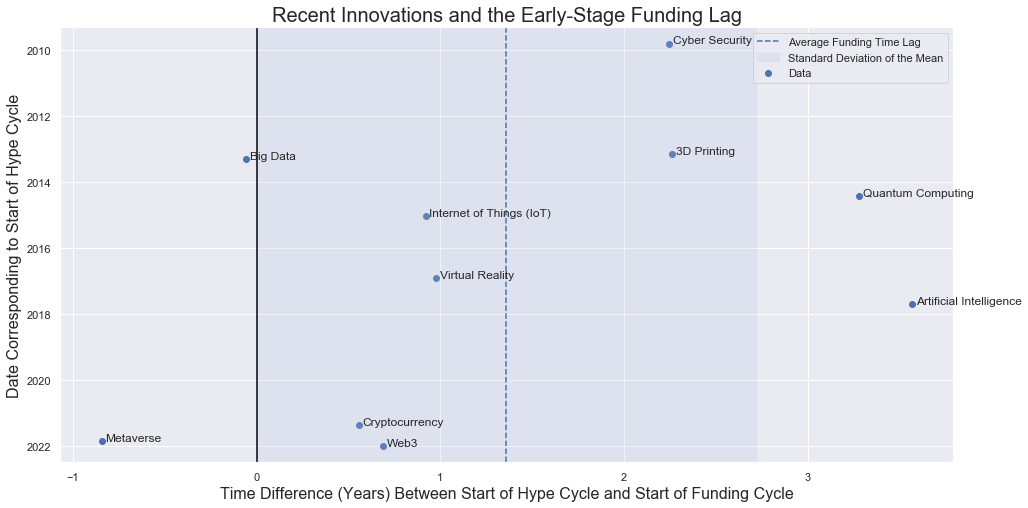

In [723]:
plot_history_summary (list(df_mains.keys()), df_return)

## Making Dates Relative to Hype

In [724]:
df_mains = relative_dates(list(df_mains.keys()), df_mains, df_return)

In [725]:
df_mains[key].head()

,Unnamed: 1,Start_of_week,date,count,Total Funding Amount Currency (in USD),Money Raised Currency (in USD),Pre-Money Valuation Currency (in USD),Total Funding Amount Currency (in USD) %,Money Raised Currency (in USD) %,Pre-Money Valuation Currency (in USD) %,...,Pre-Money Valuation Currency (in USD) %-Rolling,count-Rolling,count-Rolling %,count %-Rolling,Google Trends-Rolling,Google Trends-Rolling %,relative_date_days,relative_date_weeks,relative_date_months,relative_date_years
0,13,2013-05-27,2013-06-02,0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,13.000000,14.498141,-588,-84.0,-19.278689,-1.610959
1,11,2013-06-03,2013-06-09,2,168600000.0,11400000.0,0.0,16.739228,9.047619,0.0,...,0.0,0.666667,18.181818,13.333333,13.000000,14.498141,-581,-83.0,-19.049180,-1.591781
2,15,2013-06-10,2013-06-16,0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.666667,18.181818,13.333333,11.666667,13.011152,-574,-82.0,-18.819672,-1.572603
3,9,2013-06-17,2013-06-23,0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,12.666667,14.126394,-567,-81.0,-18.590164,-1.553425
4,14,2013-06-24,2013-06-30,0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.666667,18.181818,13.333333,11.333333,12.639405,-560,-80.0,-18.360656,-1.534247


In [726]:
df2_test = relative_dates_dfs(list(df_mains.keys()), dfs, df_return)

df2_test

,Announced Date,Equity Only Funding,Funding Stage,Funding Type,Investor Names,Lead Investors,Money Raised,Money Raised Currency,Money Raised Currency (in USD),Organization Description,...,Technology,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Transaction Name,Transaction Name URL,relative_date_days,relative_date_months,relative_date_weeks,relative_date_years
0,2013-01-01,Yes,Early Stage Venture,Series A,Social Capital,Social Capital,5500000,USD,5500000,Netskope is a security platform to protect dat...,...,Cyber Security,1441100000,USD,1441100000,Series A - Netskope,https://www.crunchbase.com/funding_round/netsk...,1171,38.393443,167.285714,3.208219
1,2012-12-13,Yes,Early Stage Venture,Series A,NaN,NaN,3000000,USD,3000000,"IDSS Holdings provides support services, techn...",...,Cyber Security,20018681,USD,20018681,Series A - IDSS Holdings,https://www.crunchbase.com/funding_round/idss-...,1152,37.770492,164.571429,3.156164
2,2012-12-12,Yes,Early Stage Venture,Series B,"Lightspeed Venture Partners, Redpoint","Lightspeed Venture Partners, Redpoint",20000000,USD,20000000,Arctic Wolf helps companies end cyber risk by ...,...,Cyber Security,899200000,USD,899200000,Series B - Arctic Wolf,https://www.crunchbase.com/funding_round/arcti...,1151,37.737705,164.428571,3.153425
3,2012-12-05,Yes,Early Stage Venture,Series A,Andreessen Horowitz,Andreessen Horowitz,30000000,USD,30000000,CipherCloud is a cloud security company that p...,...,Cyber Security,80000000,USD,80000000,Series A - CipherCloud,https://www.crunchbase.com/funding_round/ciphe...,1144,37.508197,163.428571,3.134247
4,2012-12-03,Yes,Early Stage Venture,Series B,NaN,NaN,14100000,USD,14100000,Invincea is a next-gen endpoint security softw...,...,Cyber Security,55500000,USD,55500000,Series B - Invincea,https://www.crunchbase.com/funding_round/invin...,1142,37.442623,163.142857,3.128767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,2022-03-31,Yes,Early Stage Venture,Series A,NaN,NaN,1030460,USD,1030460,Web3 for Capital Markets,...,Web3,1030460,USD,1030460,Series A - Ohanae,https://www.crunchbase.com/funding_round/ohana...,95,3.114754,13.571429,0.260274
1604,2021-10-19,Yes,Early Stage Venture,Series A,"Animoca Brands, Anthos Capital, AppWorks, Bloc...",Dapper Labs,25000000,USD,25000000,Concept Art House powers Web3 projects for the...,...,Web3,25000000,USD,25000000,Series A - Concept Art House,https://www.crunchbase.com/funding_round/conce...,-68,-2.229508,-9.714286,-0.186301
1605,2021-10-27,Yes,Early Stage Venture,Series A,"Anthony Pompliano, Arrington XRP Capital, Cros...",Tiger Global Management,35000000,USD,35000000,QuickNode is a Blockchain Development Platform...,...,Web3,101900000,USD,101900000,Series A - QuickNode,https://www.crunchbase.com/funding_round/quikn...,-60,-1.967213,-8.571429,-0.164384
1606,2021-12-06,Yes,Early Stage Venture,Series A,"Andreessen Horowitz, Coinbase Ventures, Electr...",Andreessen Horowitz,36000000,USD,36000000,Mysten Labs develops tools that make web3 secu...,...,Web3,336011316,USD,336011316,Series A - Mysten Labs,https://www.crunchbase.com/funding_round/myste...,-20,-0.655738,-2.857143,-0.054795


##### Violin Plot

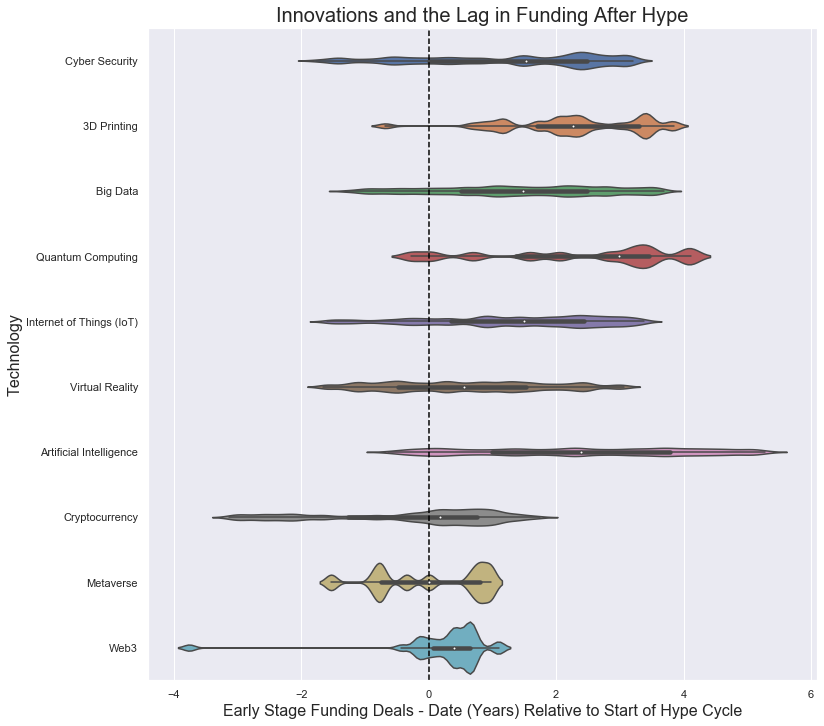

In [727]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.violinplot(data=df2_test, x="relative_date_years", y="Technology", bw = 0.1)
plt.axvline(x = 0, ls = '--', color = 'black')

plt.ylabel('Technology', fontsize = 16)
plt.xlabel('Early Stage Funding Deals - Date (Years) Relative to Start of Hype Cycle', fontsize = 16)
plt.title('Innovations and the Lag in Funding After Hype', fontsize = 20)

if saving_plots:
    plt.savefig("Plots/Time-Series/Violin_Plot_Summary.png")
plt.show()